<div class="alert alert-success">  
</div>

<div>
    <h1 align="center">Fractals with Python (Part #1)</h1></h1>
    <h1 align="center">Chaos game & Affine transformation</h1>
    <h1 align="center">Iterated Function System (IFS)</h1>
    <h4 align="center">By: Somayyeh Gholami & Deven Ramani</h4>
</div>

<div class="alert alert-success">  
</div>

In [1]:
# !pip install pygame

import random
import picture
import numpy as np
import pandas as pd

import stddraw as sdd
from stddraw import RED, GREEN, CYAN, YELLOW, PINK, BOOK_BLUE, DARK_GRAY, WHITE


In [2]:
# Fractals Data (Percentage Probability & Points Number)

frd = pd.DataFrame({     
    'Fractal Names' : ['Sierpinski', 'Barnsley',    'tree',   'Dragon',    'swirl',   'spiral'],
    'Points Number' : [      10000 ,     12000 ,    12000 ,      8000 ,      8000 ,      8000 ],
    'Probability-1' : [     0.3333 ,      0.01 ,     0.12 ,    0.7875 ,    0.9127 ,    0.8956 ],
    'Probability-2' : [     0.3333 ,      0.85 ,     0.22 ,    0.2125 ,    0.0873 ,    0.0522 ],
    'Probability-3' : [     0.3334 ,      0.07 ,     0.22 ,       0.0 ,       0.0 ,    0.0522 ],
    'Probability-4' : [        0.0 ,      0.07 ,     0.22 ,       0.0 ,       0.0 ,       0.0 ],
    'Probability-5' : [        0.0 ,       0.0 ,     0.22 ,       0.0 ,       0.0 ,       0.0 ],
    'Probability-6' : [        0.0 ,       0.0 ,      0.0 ,       0.0 ,       0.0 ,       0.0 ]    
})

print()
print('"Fractals Data (Percentage Probability & Points Number)"')
frd



"Fractals Data (Percentage Probability & Points Number)"


,Fractal Names,Points Number,Probability-1,Probability-2,Probability-3,Probability-4,Probability-5,Probability-6
0,Sierpinski,10000,0.3333,0.3333,0.3334,0.00,0.00,0.0
1,Barnsley,12000,0.0100,0.8500,0.0700,0.07,0.00,0.0
2,tree,12000,0.1200,0.2200,0.2200,0.22,0.22,0.0
3,Dragon,8000,0.7875,0.2125,0.0000,0.00,0.00,0.0
4,swirl,8000,0.9127,0.0873,0.0000,0.00,0.00,0.0
5,spiral,8000,0.8956,0.0522,0.0522,0.00,0.00,0.0


In [3]:
# Fractals Parameters on the X-axis

frpx = pd.DataFrame({      
    'Fractal Names'   : [            'Sierpinski',               'Barnsley',                   'tree',                 'Dragon',                  'swirl',                 'spiral'],
    'x-Probability-1' : [[+.5000,    0.0, +.0000], [   0.0,    0.0, +.5000], [   0.0,    0.0, +.5500], [+.8240, +.2810, -.1000], [+.7450, -.4590, +.2730], [+.7880, -.4240, +.2820]],
    'x-Probability-2' : [[+.5000,    0.0, +.5000], [+.8500, +.0400, +.0750], [+.4200, +.2600, +.2900], [+.0880, +.5210, +.5340], [-.4240, -.0650, +1.093], [-.1210, +.2570, -.1110]],
    'x-Probability-3' : [[+.5000,    0.0, +.2500], [+.2000, -.2600, +.4000], [+.4600, -.1500, +.2700], [   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0], [+.1820, -.1360, +1.018]],             
    'x-Probability-4' : [[   0.0,    0.0,    0.0], [-.1500, +.2800, +.5750], [+.4700, -.1500, +.2650], [   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0]],          
    'x-Probability-5' : [[   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0], [+.4300, +.2800, +.2850], [   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0]],
    'x-Probability-6' : [[   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0]]
})

print()
print('"Fractals Parameters on the X-axis"')
frpx



"Fractals Parameters on the X-axis"


,Fractal Names,x-Probability-1,x-Probability-2,x-Probability-3,x-Probability-4,x-Probability-5,x-Probability-6
0,Sierpinski,"[0.5, 0.0, 0.0]","[0.5, 0.0, 0.5]","[0.5, 0.0, 0.25]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
1,Barnsley,"[0.0, 0.0, 0.5]","[0.85, 0.04, 0.075]","[0.2, -0.26, 0.4]","[-0.15, 0.28, 0.575]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
2,tree,"[0.0, 0.0, 0.55]","[0.42, 0.26, 0.29]","[0.46, -0.15, 0.27]","[0.47, -0.15, 0.265]","[0.43, 0.28, 0.285]","[0.0, 0.0, 0.0]"
3,Dragon,"[0.824, 0.281, -0.1]","[0.088, 0.521, 0.534]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
4,swirl,"[0.745, -0.459, 0.273]","[-0.424, -0.065, 1.093]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
5,spiral,"[0.788, -0.424, 0.282]","[-0.121, 0.257, -0.111]","[0.182, -0.136, 1.018]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"


In [4]:
# Fractals Parameters on the Y-axis

frpy = pd.DataFrame({     
    'Fractal Names'   : [            'Sierpinski',               'Barnsley',                   'tree',                 'Dragon',                  'swirl',                 'spiral'],
    'y-Probability-1' : [[   0.0, +.5000,    0.0], [0.0000, +.1600, 0.0000], [   0.0, +.6000,    0.0], [-.2120, +.8640, +.0950], [+.4060, +.8870, -.1340], [+.2420, +.8590, +.0190]],
    'y-Probability-2' : [[   0.0, +.5000,    0.0], [-.0400, +.8500, +.1800], [-.3500, +.3100, +.5250], [-.4640, -.3780, +1.041], [-.1760, -.2180, +.7620], [+.1510, +.0530, +.0620]],
    'y-Probability-3' : [[   0.0, +.5000, +.4330], [+.2300, +.2200, +.0450], [+.3900, +.3800, +.1050], [   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0], [+.3900, +.3800, +.1050]],       
    'y-Probability-4' : [[   0.0,    0.0,    0.0], [+.2600, +.2400, -.0860], [+.1700, +.4200, +.4650], [   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0]],      
    'y-Probability-5' : [[   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0], [-.2500, +.4500, +.6250], [   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0]],       
    'y-Probability-6' : [[   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0], [   0.0,    0.0,    0.0]]           
})

print()
print('"Fractals Parameters on the Y-axis"')
frpy



"Fractals Parameters on the Y-axis"


,Fractal Names,y-Probability-1,y-Probability-2,y-Probability-3,y-Probability-4,y-Probability-5,y-Probability-6
0,Sierpinski,"[0.0, 0.5, 0.0]","[0.0, 0.5, 0.0]","[0.0, 0.5, 0.433]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
1,Barnsley,"[0.0, 0.16, 0.0]","[-0.04, 0.85, 0.18]","[0.23, 0.22, 0.045]","[0.26, 0.24, -0.086]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
2,tree,"[0.0, 0.6, 0.0]","[-0.35, 0.31, 0.525]","[0.39, 0.38, 0.105]","[0.17, 0.42, 0.465]","[-0.25, 0.45, 0.625]","[0.0, 0.0, 0.0]"
3,Dragon,"[-0.212, 0.864, 0.095]","[-0.464, -0.378, 1.041]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
4,swirl,"[0.406, 0.887, -0.134]","[-0.176, -0.218, 0.762]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"
5,spiral,"[0.242, 0.859, 0.019]","[0.151, 0.053, 0.062]","[0.39, 0.38, 0.105]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]","[0.0, 0.0, 0.0]"


In [5]:
# a refers to the name of one of the well-known fractal image

def Possibility(a):
    cumulative = 0.0
    po = random.randrange(10000)
    
    for i in range(1, 7):        
        cumulative += frd.iloc[a, (i+1)]         
        if (po <= (cumulative * 10000)):
            return i      
# __________________________________________________________________________________________________________

x, y = 0, 0 
sdd.setXscale(-0.60, +1.05)
sdd.setYscale(-0.05, +1.05)
sdd.setCanvasSize(1200, 800)
vub = picture.Picture('vub.png')
colors = [RED, GREEN, CYAN, YELLOW, PINK, BOOK_BLUE]

for i in range(6):
    sdd.setPenColor(WHITE)
    sdd.clear(sdd.DARK_GRAY)
    
    sdd.setFontSize(s=36)
    sdd.picture(vub, 0.9, 0.90)
    sdd.text(0.225, 1.00,'Chaos game & Affine transformation')   
    sdd.text(-0.42, 0.90, frd.iloc[i, 0])
    
    sdd.setFontSize(s=28)
    sdd.text(-0.42, 0.85,'Points Number:')
    sdd.text(-0.42, 0.80, f'({frd.iloc[i, 1]})')
    sdd.circle(-0.42, 0.85, 0.13)
    
    sdd.setFontSize(s=24)
    sdd.text(-0.42, 0.00,'By: Somayyeh Gholami')        
    sdd.text(-0.15, 0.77, f'X_new == A*X + B*Y + C')
    sdd.text(-0.15, 0.73, f'Y_new == D*X + E*Y + F')    
    
    sdd.setPenColor(RED)    
    sdd.circle(-0.42, 0.65, 0.06)
    sdd.text(-0.42, 0.65, f'{frd.iloc[i, 2]}%')    
    sdd.text(-0.20, 0.67, f'Px: {frpx.iloc[i, 1]}')
    sdd.text(-0.20, 0.63, f'Py: {frpy.iloc[i, 1]}')
        
    sdd.setPenColor(GREEN)
    sdd.circle(-0.42, 0.55, 0.06)
    sdd.text(-0.42, 0.55, f'{frd.iloc[i, 3]}%')
    sdd.text(-0.20, 0.57, f'Px: {frpx.iloc[i, 2]}')
    sdd.text(-0.20, 0.53, f'Py: {frpy.iloc[i, 2]}')    
    
    sdd.setPenColor(CYAN)
    sdd.circle(-0.42, 0.45, 0.06)
    sdd.text(-0.42, 0.45, f'{frd.iloc[i, 4]}%')
    sdd.text(-0.20, 0.47, f'Px: {frpx.iloc[i, 3]}')
    sdd.text(-0.20, 0.43, f'Py: {frpy.iloc[i, 3]}')    
    
    sdd.setPenColor(YELLOW)
    sdd.circle(-0.42, 0.35, 0.06)
    sdd.text(-0.42, 0.35, f'{frd.iloc[i, 5]}%')
    sdd.text(-0.20, 0.37, f'Px: {frpx.iloc[i, 4]}')
    sdd.text(-0.20, 0.33, f'Py: {frpy.iloc[i, 4]}')
    
    sdd.setPenColor(PINK)
    sdd.circle(-0.42, 0.25, 0.06)
    sdd.text(-0.42, 0.25, f'{frd.iloc[i, 6]}%')
    sdd.text(-0.20, 0.27, f'Px: {frpx.iloc[i, 5]}')
    sdd.text(-0.20, 0.23, f'Py: {frpy.iloc[i, 5]}')
    
    sdd.setPenColor(BOOK_BLUE)
    sdd.circle(-0.42, 0.15, 0.06)
    sdd.text(-0.42, 0.15, f'{frd.iloc[i, 7]}%')
    sdd.text(-0.20, 0.17, f'Px: {frpx.iloc[i, 6]}')
    sdd.text(-0.20, 0.13, f'Py: {frpy.iloc[i, 6]}') 
    
# __________________________________________________________________________________________________________    
        
    for j in range(frd.iloc[i, 1]):                
        p = Possibility(i)   
        
        x = (frpx.iloc[i, p][0]*x) + (frpx.iloc[i, p][1]*y) + (frpx.iloc[i, p][2])
        y = (frpy.iloc[i, p][0]*x) + (frpy.iloc[i, p][1]*y) + (frpy.iloc[i, p][2])        

        sdd.setPenColor(colors[p-1]) 
        sdd.setPenRadius(0.0035)
        sdd.point(x, y)
        sdd.show(0) 

#       To make a gif
#       if ((j % 1000) == 0): sdd._saveToFile()   
    

<img src="files/gif101.gif"> 

<div class="alert alert-success">  
</div>

In [1]:

import random
import picture
import numpy as np
import pandas as pd

import stddraw as sdd
from stddraw import GREEN, DARK_GREEN, YELLOW, ORANGE, DARK_GRAY, WHITE 

# __________________________________________________________________________________________________________

# X_new == AX + BY + C
# Y_new == DY + EY + F

fr = pd.DataFrame({     
    'Fractal Names' : ['Percentage',        'A',        'B',       'C',        'D',       'E',        'F'],
    'Probability-1' : [       0.10 ,     0.000 ,     0.000 ,    0.000 ,    0.000 ,     0.600,     -0.065 ],
    'Probability-2' : [       0.18 ,     0.440 ,     0.000 ,    0.000 ,    0.000 ,     0.550,      0.200 ],
    'Probability-3' : [       0.18 ,     0.343 ,    -0.248 ,   -0.030 ,    0.199 ,     0.429,      0.100 ],
    'Probability-4' : [       0.18 ,     0.343 ,     0.248 ,    0.030 ,   -0.199 ,     0.429,      0.100 ],
    'Probability-5' : [       0.18 ,     0.280 ,    -0.350 ,   -0.050 ,    0.280 ,     0.350,      0.000 ],
    'Probability-6' : [       0.18 ,     0.280 ,     0.350 ,    0.050 ,   -0.280 ,     0.350,      0.000 ]    
})

print()
print('"Fractals Data (Percentage Probability & Parameters)"')
fr



"Fractals Data (Percentage Probability & Parameters)"


,Fractal Names,Probability-1,Probability-2,Probability-3,Probability-4,Probability-5,Probability-6
0,Percentage,0.100,0.18,0.180,0.180,0.18,0.18
1,A,0.000,0.44,0.343,0.343,0.28,0.28
2,B,0.000,0.00,-0.248,0.248,-0.35,0.35
3,C,0.000,0.00,-0.030,0.030,-0.05,0.05
4,D,0.000,0.00,0.199,-0.199,0.28,-0.28
5,E,0.600,0.55,0.429,0.429,0.35,0.35
6,F,-0.065,0.20,0.100,0.100,0.00,0.00


In [2]:

def Possibil1(a):
    cumulative = 0.0
    
    for i in range(1, 7):        
        cumulative += fr.iloc[0, i]         
        if (a <= (cumulative * 10000)):
            return i                 
# __________________________________________________________________________________________________________

sdd.setXscale(-0.35, +0.35)
sdd.setYscale(-0.15, +0.45)
sdd.setCanvasSize(800, 800)
vub = picture.Picture('vub.png')

sdd.setFontSize(s=24)
sdd.setPenColor(WHITE)
sdd.clear(sdd.DARK_GRAY)
sdd.picture(vub, 0.28, -0.095)
sdd.text(-0.22, -0.11,'By: Somayyeh Gholami') 
colors = [GREEN, GREEN, YELLOW, GREEN, GREEN, GREEN]

x, y = 0, 0 
for i in range(28000): 
    po = random.randrange(10000)
    p =  Possibil1(po)   
        
    x = (fr.iloc[1, p]*x) + (fr.iloc[2, p]*y) + (fr.iloc[3, p])
    y = (fr.iloc[4, p]*x) + (fr.iloc[5, p]*y) + (fr.iloc[6, p])        

    sdd.setPenColor(colors[p-1])
    sdd.setPenRadius(0)
    sdd.point(x, y)
    sdd.show(0)
    
#   To make a gif
#   if ((i % 2000) == 0): sdd._saveToFile()    


<img src="files/gif201.gif"> 

<div class="alert alert-success">  
</div>

In [3]:

import random
import picture
import numpy as np
import pandas as pd

import stddraw as sdd
from stddraw import GREEN, DARK_GREEN, YELLOW, ORANGE, DARK_GRAY, WHITE 

# __________________________________________________________________________________________________________

# X_new == AX + BY + C
# Y_new == DY + EY + F

fr = pd.DataFrame({     
    'Fractal Names' : ['Percentage',        'A',        'B',       'C',        'D',       'E',        'F'],
    'Probability-1' : [       0.10 ,     0.000 ,     0.000 ,    0.000 ,    0.000 ,     0.600,     -0.065 ],
    'Probability-2' : [       0.18 ,     0.440 ,     0.000 ,    0.000 ,    0.000 ,     0.550,      0.200 ],
    'Probability-3' : [       0.18 ,     0.343 ,    -0.248 ,   -0.030 ,    0.199 ,     0.429,      0.100 ],
    'Probability-4' : [       0.18 ,     0.343 ,     0.248 ,    0.030 ,   -0.199 ,     0.429,      0.100 ],
    'Probability-5' : [       0.18 ,     0.280 ,    -0.350 ,   -0.050 ,    0.280 ,     0.350,      0.000 ],
    'Probability-6' : [       0.18 ,     0.280 ,     0.350 ,    0.050 ,   -0.280 ,     0.350,      0.000 ]    
})

print()
print('"Fractals Data (Percentage Probability & Parameters)"')
fr



"Fractals Data (Percentage Probability & Parameters)"


,Fractal Names,Probability-1,Probability-2,Probability-3,Probability-4,Probability-5,Probability-6
0,Percentage,0.100,0.18,0.180,0.180,0.18,0.18
1,A,0.000,0.44,0.343,0.343,0.28,0.28
2,B,0.000,0.00,-0.248,0.248,-0.35,0.35
3,C,0.000,0.00,-0.030,0.030,-0.05,0.05
4,D,0.000,0.00,0.199,-0.199,0.28,-0.28
5,E,0.600,0.55,0.429,0.429,0.35,0.35
6,F,-0.065,0.20,0.100,0.100,0.00,0.00


In [4]:

def Possibil1(a):
    
    cumulative = 0.0    
    for i in range(1, 7):        
        cumulative += fr.iloc[0, i]         
        if (a <= (cumulative * 10000)):
            return i                 
# __________________________________________________________________________________________________________

def Possibil2(b):
    
    if (b <= 65): 
        return 0  #  GREEN 65%
    if (b <= 70): 
        return 1  #  DARK_GREEN 5%  
    if (b <= 95): 
        return 2  #  YELLOW 25% 
    else:         
        return 3  #  ORANGE 5%       
# __________________________________________________________________________________________________________

sdd.setXscale(-0.35, +0.35)
sdd.setYscale(-0.15, +0.45)
sdd.setCanvasSize(800, 800)
vub = picture.Picture('vub.png')

sdd.setFontSize(s=24)
sdd.setPenColor(WHITE)
sdd.clear(sdd.DARK_GRAY)
sdd.picture(vub, 0.28, -0.095)
sdd.text(-0.22, -0.11,'By: Somayyeh Gholami') 
colors = [GREEN, DARK_GREEN, YELLOW, ORANGE]

x, y = 0, 0 
for i in range(36000): 
    po = random.randrange(10000)
    p =  Possibil1(po)   
        
    x = (fr.iloc[1, p]*x) + (fr.iloc[2, p]*y) + (fr.iloc[3, p])
    y = (fr.iloc[4, p]*x) + (fr.iloc[5, p]*y) + (fr.iloc[6, p])
    
    if (p == 1 or p == 3):
        sdd.setPenColor(colors[p-1])
    else:        
        co = random.randrange(100)
        c =  Possibil2(co)        
        sdd.setPenColor(colors[c])
    
    sdd.setPenRadius(0)
    f = sdd.point(x, y)
    sdd.show(0)

#   To make a gif
#   if ((i % 2000) == 0): sdd._saveToFile() 
        

<img src="files/gif301.gif"> 

<div class="alert alert-success">  
</div>

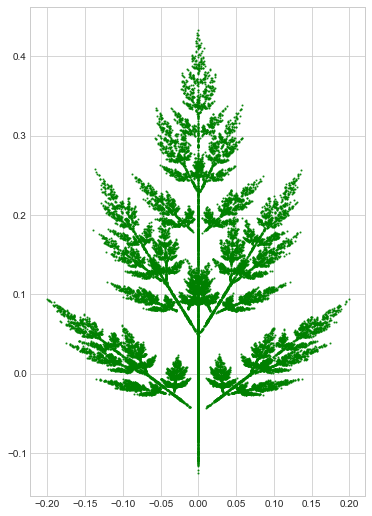

In [42]:
%matplotlib inline

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# __________________________________________________________________________________________________________

# X_new == AX + BY + C
# Y_new == DY + EY + F

fr = pd.DataFrame({     
    'Fractal Names' : ['Percentage',        'A',        'B',       'C',        'D',       'E',        'F'],
    'Probability-1' : [       0.10 ,     0.000 ,     0.000 ,    0.000 ,    0.000 ,     0.600,     -0.065 ],
    'Probability-2' : [       0.18 ,     0.440 ,     0.000 ,    0.000 ,    0.000 ,     0.550,      0.200 ],
    'Probability-3' : [       0.18 ,     0.343 ,    -0.248 ,   -0.030 ,    0.199 ,     0.429,      0.100 ],
    'Probability-4' : [       0.18 ,     0.343 ,     0.248 ,    0.030 ,   -0.199 ,     0.429,      0.100 ],
    'Probability-5' : [       0.18 ,     0.280 ,    -0.350 ,   -0.050 ,    0.280 ,     0.350,      0.000 ],
    'Probability-6' : [       0.18 ,     0.280 ,     0.350 ,    0.050 ,   -0.280 ,     0.350,      0.000 ]    
})

# __________________________________________________________________________________________________________

def Possibil1(a):
    cumulative = 0.0
    
    for i in range(1, 7):        
        cumulative += fr.iloc[0, i]         
        if (a <= (cumulative * 10000)):
            return i                 
# __________________________________________________________________________________________________________

points = []
x, y = 0, 0
for i in range(28000):
    po = random.randrange(10000)
    p =  Possibil1(po)   
        
    x = (fr.iloc[1, p]*x) + (fr.iloc[2, p]*y) + (fr.iloc[3, p])
    y = (fr.iloc[4, p]*x) + (fr.iloc[5, p]*y) + (fr.iloc[6, p]) 
    
    points.append(np.array([x, y]))
    
generated = np.vstack(points) 

plt.figure(figsize=(6, 9))
plt.style.use('seaborn-whitegrid')
plt.scatter(generated[:, 0] , generated[:, 1] , s=1.2 , alpha=0.8 , color='green')  
    

<div class="alert alert-success">  
</div>